
# Analytical Simulation Project: The Importance of Asking the Right Questions

This notebook showcases how asking a *specific, measurable question* leads to deeper insights using the Telco Customer Churn dataset.

We contrast the vague question:
> "Why are customers leaving?"

With the precise question:
> "Which customer traits and behaviors are most strongly associated with churn?"



In [21]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [22]:
# Load dataset
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
telco_df = pd.read_csv(file_path)

# Convert TotalCharges to numeric
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')
telco_df_cleaned = telco_df.dropna(subset=['TotalCharges']).reset_index(drop=True)

In [23]:
# Convert 'Churn' to category
telco_df_cleaned['Churn'] = telco_df_cleaned['Churn'].astype('category')

In [24]:
# Encode all categorical columns
telco_encoded = telco_df_cleaned.copy()
le = LabelEncoder()
for col in telco_encoded.columns:
    if telco_encoded[col].dtype == 'object' or telco_encoded[col].dtype.name == 'category':
        telco_encoded[col] = le.fit_transform(telco_encoded[col])

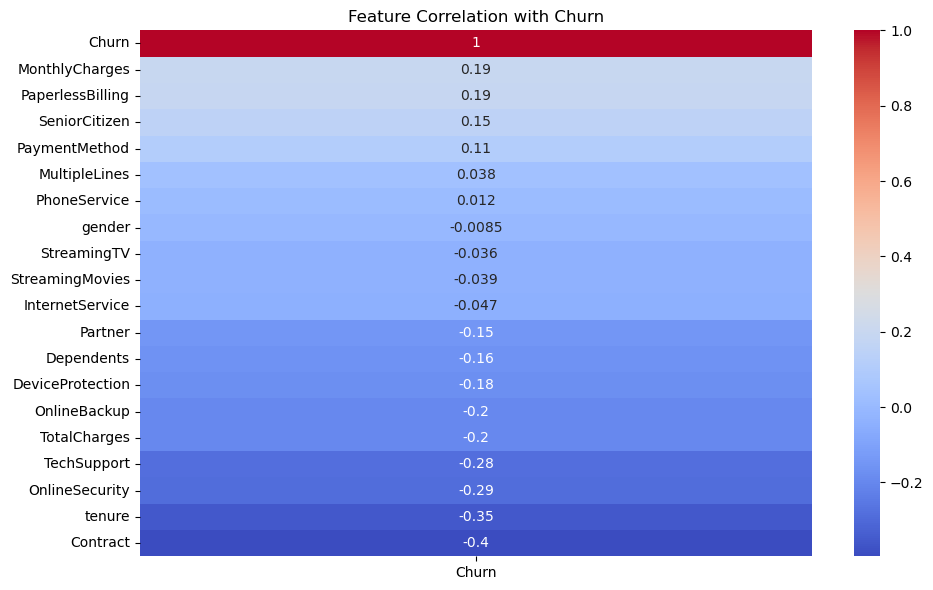

In [25]:
# Correlation Matrix
correlation_matrix = telco_encoded.drop(columns=['customerID']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Churn')
plt.tight_layout()
plt.show()

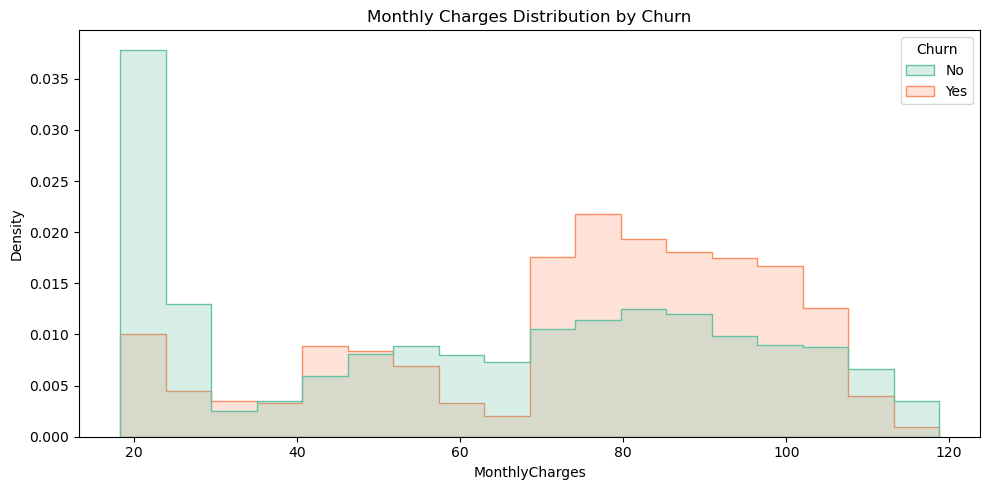

In [26]:
# Monthly Charges Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=telco_df_cleaned, x='MonthlyCharges', hue='Churn', element='step', stat='density', common_norm=False, palette='Set2')
plt.title('Monthly Charges Distribution by Churn')
plt.tight_layout()
plt.show()

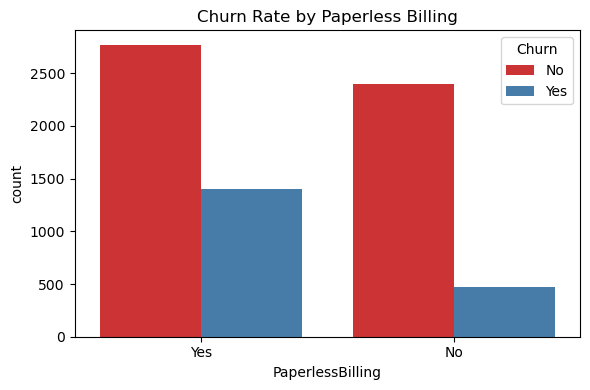

In [27]:
# Paperless Billing
plt.figure(figsize=(6, 4))
sns.countplot(data=telco_df_cleaned, x='PaperlessBilling', hue='Churn', palette='Set1')
plt.title('Churn Rate by Paperless Billing')
plt.tight_layout()
plt.show()

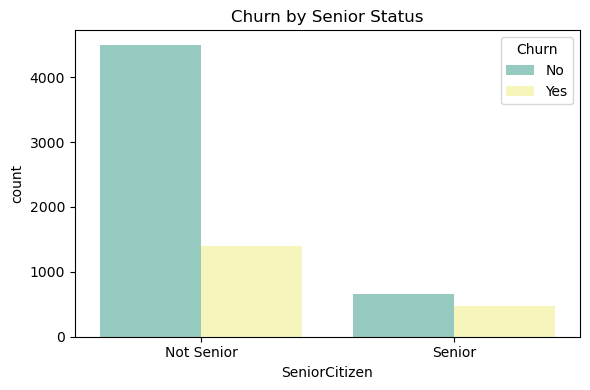

In [28]:
# Senior Citizen
plt.figure(figsize=(6, 4))
sns.countplot(data=telco_df_cleaned, x='SeniorCitizen', hue='Churn', palette='Set3')
plt.title('Churn by Senior Status')
plt.xticks([0, 1], ['Not Senior', 'Senior'])
plt.tight_layout()
plt.show()

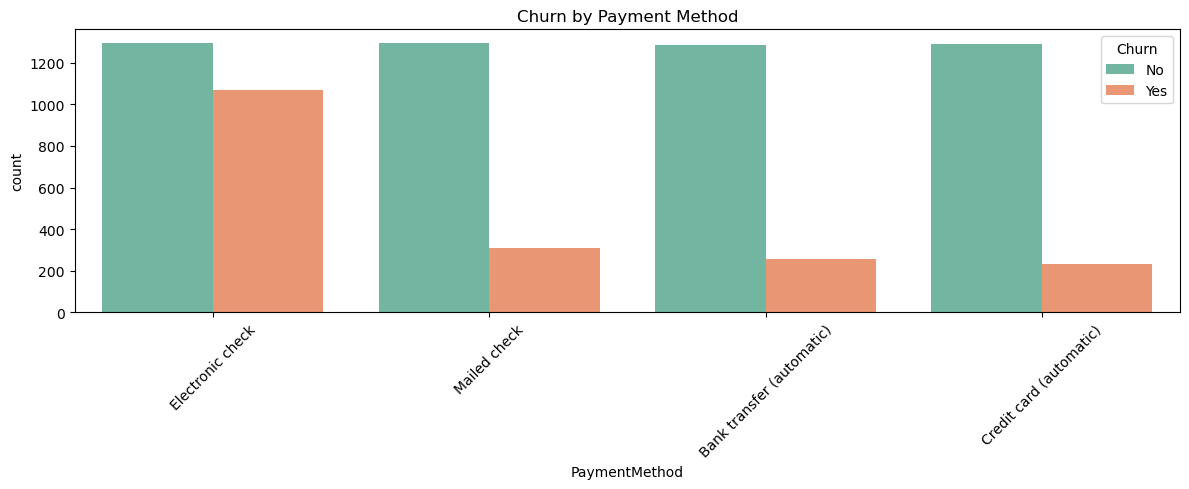

In [29]:
# Payment Method
plt.figure(figsize=(12, 5))
sns.countplot(data=telco_df_cleaned, x='PaymentMethod', hue='Churn', palette='Set2')
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

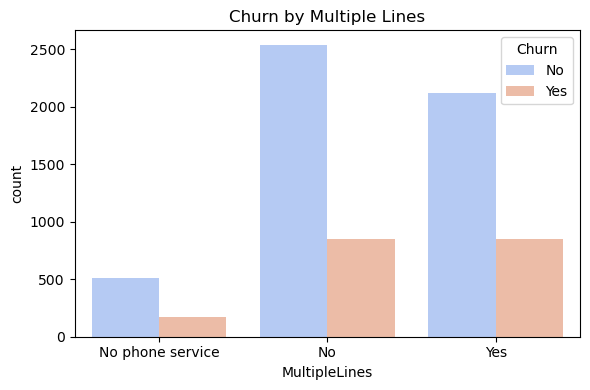

In [30]:
# Multiple Lines
plt.figure(figsize=(6, 4))
sns.countplot(data=telco_df_cleaned, x='MultipleLines', hue='Churn', palette='coolwarm')
plt.title('Churn by Multiple Lines')
plt.tight_layout()
plt.show()

📊 Visual Insights from EDA
Based on the visualizations, here’s what we learned:

    1. Monthly Charges
    Customers with higher monthly charges show higher churn rates.

    There's a visible skew: churn is more prevalent in the ₹70–₹110 range.

    2. Paperless Billing
    Customers using paperless billing are more likely to churn than those receiving physical bills.

    3. Senior Citizens
    Seniors have a noticeably higher churn rate compared to non-seniors.

    4. Payment Method
    Electronic check users show significantly higher churn.

    Other methods like bank transfers or credit cards seem to have relatively lower churn rates.

    5. Multiple Lines
    A slight increase in churn for users with multiple lines, but the difference is not very significant.


🧠 Logical Conclusion & Analytical Framing
Let’s contrast two approaches based on our original article theme:

    ❌ Ambiguous Question
    "Why are customers leaving our service?"

    Leads to broad speculations and superficial answers.

    Doesn't tell you what actions to take or where to look first.

    ✅ Clear, Measurable Question
    "Which customer traits and behaviors are most strongly associated with higher churn?"

    This led us to actionable insights:

    Target users with high monthly charges with loyalty offers.

    Incentivize or educate paperless billing users, possibly improving their satisfaction.

    Offer senior-friendly plans to reduce churn in that demographic.

    Discourage churn-heavy payment methods (e.g., switch electronic check users to auto-debit).